# Análisis Exploratorio de Datos (EDA) - LifeMiles

Este notebook contiene el análisis exploratorio para el proyecto de predicción de ventas.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Configuración de Estilo para Gráficos ---
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

## 1. Carga y Simulación de Datos

Se simulan los datos descritos en el plan del proyecto. En un escenario real, se cargaría el archivo CSV directamente.

In [1]:
import os
import pandas as pd

def find_folder_upwards(folder_name, start_path=None):
    """Busca una carpeta hacia arriba en la jerarquía"""
    if start_path is None:
        start_path = os.getcwd()
    path = start_path
    while True:
        candidate = os.path.join(path, folder_name)
        if os.path.isdir(candidate):
            return candidate
        new_path = os.path.dirname(path)
        if new_path == path:
            raise FileNotFoundError(f"No se encontró la carpeta '{folder_name}' en ningún directorio superior.")
        path = new_path

# Detectar automáticamente la carpeta "data"
ruta = find_folder_upwards("data")
print("Carpeta data ubicada en:", ruta)

# Listar CSVs
archivos = [f for f in os.listdir(ruta) if f.endswith(".csv")]
print("Archivos encontrados:", archivos)

# Unirlos
dfs = [pd.read_csv(os.path.join(ruta, f)) for f in archivos]
df = pd.concat(dfs, ignore_index=True)

print("DataFrame unificado con", len(df), "filas.")
df.head()


Carpeta data ubicada en: w:\Learning\Proyecto_desarrollo_de_soluciones\data
Archivos encontrados: ['data_lm_202501.csv', 'data_lm_202502.csv', 'data_lm_202503.csv']


C:\Users\crist\AppData\Local\Temp\ipykernel_49988\763083108.py:27: DtypeWarning: Columns (11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(os.path.join(ruta, f)) for f in archivos]
C:\Users\crist\AppData\Local\Temp\ipykernel_49988\763083108.py:27: DtypeWarning: Columns (11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(os.path.join(ruta, f)) for f in archivos]


DataFrame unificado con 496942 filas.


C:\Users\crist\AppData\Local\Temp\ipykernel_49988\763083108.py:27: DtypeWarning: Columns (11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(os.path.join(ruta, f)) for f in archivos]


,Unnamed: 0,Membership Number,Partner Code,Partner Name,Transaction Date,Process Date,Bonus Name,Transaction Type,Local Amount,Miles,...,City,Activity Number,Activity Reference Number,AÑO,MES,Facturación,MES NUMERO,TRANSACCION,TRANSACCIONES,Month Key
0,0,13445819984,VSSCO,Victoria Secret Colombia,2025-01-02,2025-01-02,ACUM COMPRA COMERCIO REGULAR,ACUMULACIÓN,167984.0,38.0,...,NaN,ACT366833600,549740431.0,2025,enero,0.570,1,ACUMULACIÓN,1,202501
1,1,376166836,VSSCO,Victoria Secret Colombia,2025-01-02,2025-01-02,ACUM COMPRA COMERCIO REGULAR,ACUMULACIÓN,613194.0,139.0,...,NaN,ACT366855958,549752612.0,2025,enero,2.085,1,ACUMULACIÓN,1,202501
2,2,517129045,VSSCO,Victoria Secret Colombia,2025-01-02,2025-01-02,ACUM COMPRA COMERCIO REGULAR,ACUMULACIÓN,143151.0,32.0,...,NaN,ACT366881794,549775611.0,2025,enero,0.480,1,ACUMULACIÓN,1,202501
3,3,13433013790,VSSCO,Victoria Secret Colombia,2025-01-02,2025-01-02,ACUM COMPRA COMERCIO REGULAR,ACUMULACIÓN,268572.0,61.0,...,NaN,ACT366843278,549746599.0,2025,enero,0.915,1,ACUMULACIÓN,1,202501
4,4,13505839594,VSSCO,Victoria Secret Colombia,2025-01-02,2025-01-02,ACUM COMPRA COMERCIO REGULAR,ACUMULACIÓN,117564.0,27.0,...,NaN,ACT366857341,549752662.0,2025,enero,0.405,1,ACUMULACIÓN,1,202501


## 2. Inspección Inicial y Preprocesamiento

Se realiza una revisión básica de la estructura de los datos y se convierten las columnas de fecha.

In [5]:
df.info()

df.describe()

df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Year'] = df['Transaction Date'].dt.year
df['Month'] = df['Transaction Date'].dt.month
df['DayOfWeek'] = df['Transaction Date'].dt.dayofweek

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496942 entries, 0 to 496941
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Unnamed: 0                 496942 non-null  int64         
 1   Membership Number          496942 non-null  int64         
 2   Partner Code               496942 non-null  object        
 3   Partner Name               496942 non-null  object        
 4   Transaction Date           496942 non-null  datetime64[ns]
 5   Process Date               496942 non-null  object        
 6   Bonus Name                 478768 non-null  object        
 7   Transaction Type           496942 non-null  object        
 8   Local Amount               495796 non-null  float64       
 9   Miles                      496942 non-null  float64       
 10  Exchange Rate              472141 non-null  float64       
 11  Currency                   25701 non-null   object  

## 3. Análisis y Visualizaciones

Se generan gráficos para entender las tendencias y distribuciones clave en los datos.

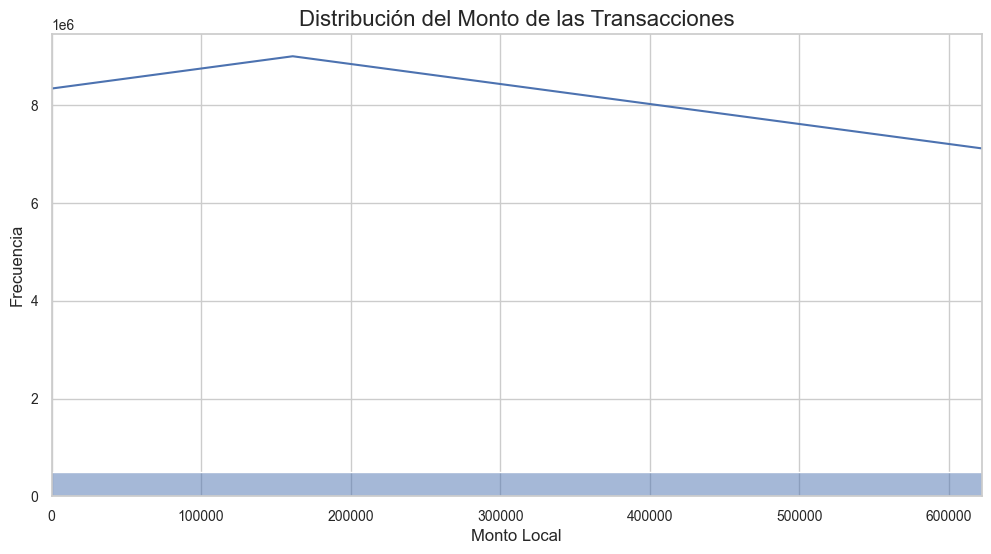

In [6]:
# Gráfico 1: Distribución del Monto de las Transacciones
plt.figure()
sns.histplot(df['Local Amount'], bins=50, kde=True)
plt.title('Distribución del Monto de las Transacciones')
plt.xlabel('Monto Local')
plt.ylabel('Frecuencia')
plt.xlim(0, df['Local Amount'].quantile(0.95))
plt.savefig('distribucion_monto.png')
plt.show()

/var/folders/xf/b17t42hx69v9kbg973g7c6_w0000gp/T/ipykernel_92953/3510736715.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_over_time = df.set_index('Transaction Date').resample('M')['Local Amount'].sum()


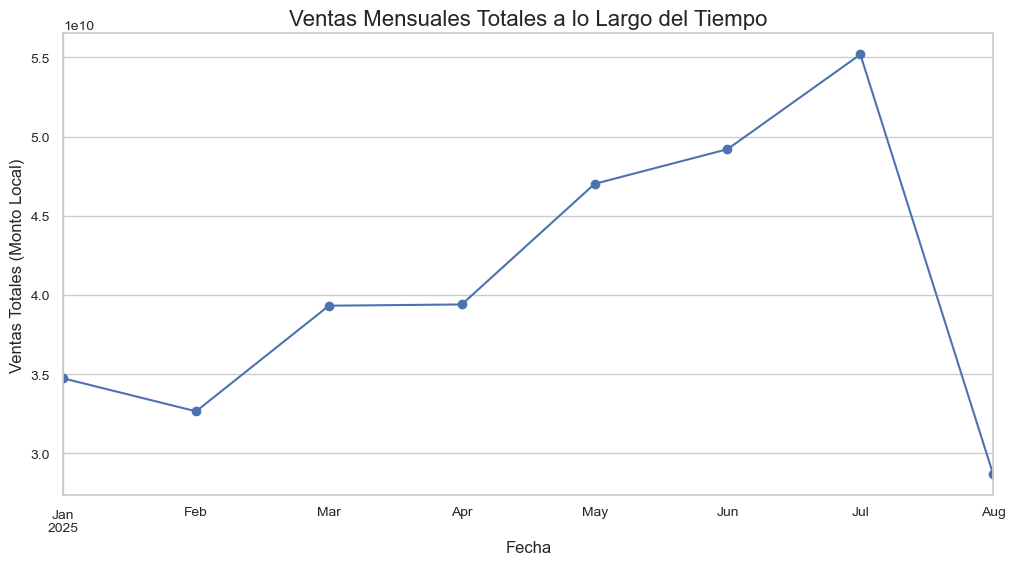

In [5]:
# Gráfico 2: Ventas Mensuales Totales
plt.figure()
sales_over_time = df.set_index('Transaction Date').resample('M')['Local Amount'].sum()
sales_over_time.plot(kind='line', marker='o')
plt.title('Ventas Mensuales Totales a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales (Monto Local)')
plt.grid(True)
plt.savefig('ventas_mensuales.png')
plt.show()

/var/folders/xf/b17t42hx69v9kbg973g7c6_w0000gp/T/ipykernel_92953/3343134328.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_partner.values, y=sales_by_partner.index, palette='viridis')


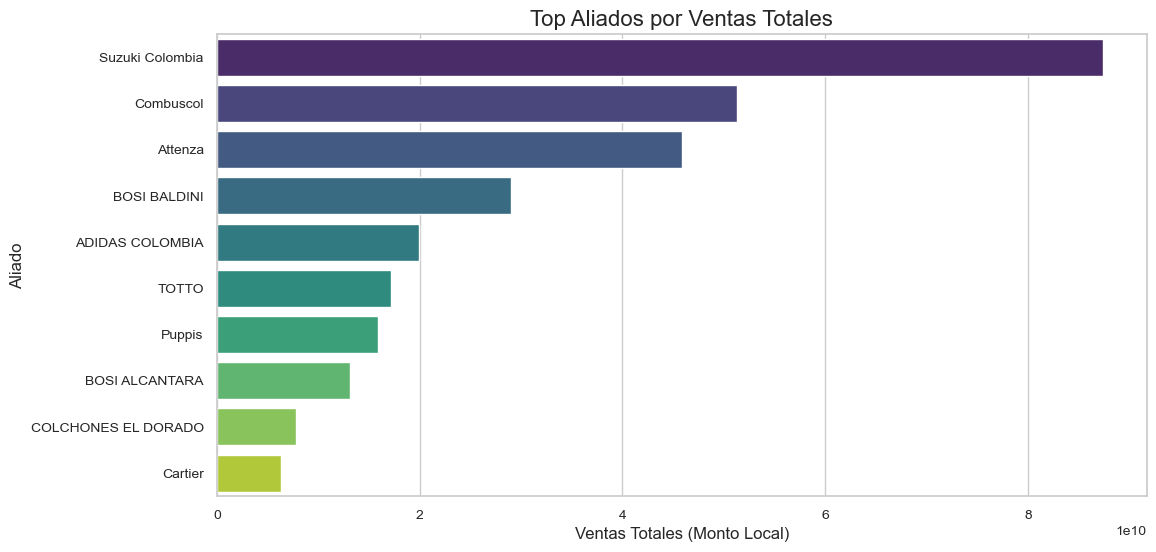

In [6]:
# Gráfico 3: Ventas por Aliado (Top 10)
plt.figure()
sales_by_partner = df.groupby('Partner Name')['Local Amount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=sales_by_partner.values, y=sales_by_partner.index, palette='viridis')
plt.title('Top Aliados por Ventas Totales')
plt.xlabel('Ventas Totales (Monto Local)')
plt.ylabel('Aliado')
plt.savefig('ventas_por_aliado.png')
plt.show()

/var/folders/xf/b17t42hx69v9kbg973g7c6_w0000gp/T/ipykernel_92953/2293440382.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_country.values, y=sales_by_country.index, palette='plasma')


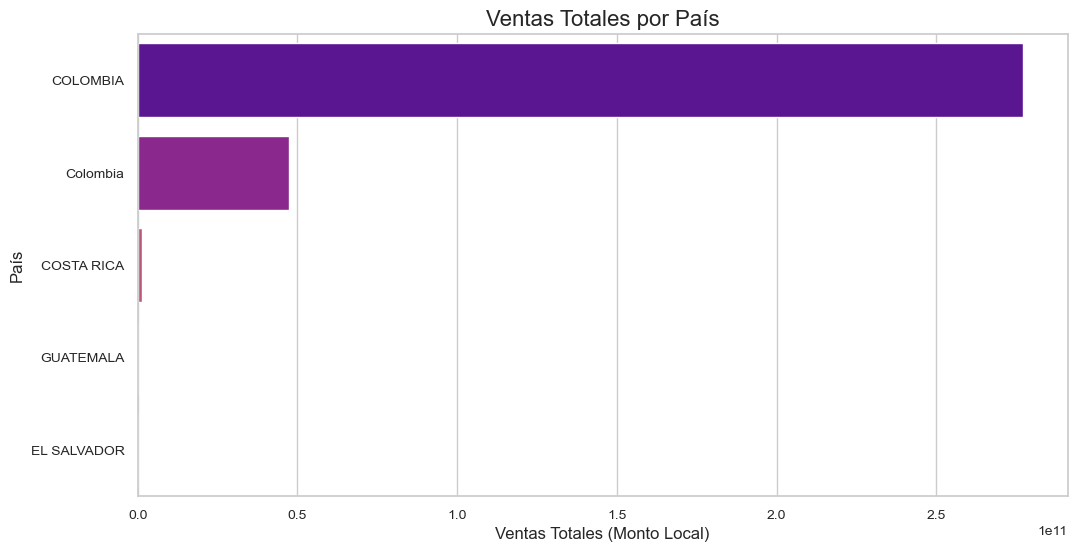

In [7]:
# Gráfico 4: Ventas Totales por País
plt.figure()
sales_by_country = df.groupby('Country')['Local Amount'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_country.values, y=sales_by_country.index, palette='plasma')
plt.title('Ventas Totales por País')
plt.xlabel('Ventas Totales (Monto Local)')
plt.ylabel('País')
plt.savefig('ventas_por_pais.png')
plt.show()

/var/folders/xf/b17t42hx69v9kbg973g7c6_w0000gp/T/ipykernel_92953/2272495661.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_dow.index, y=sales_by_dow.values, palette='magma')


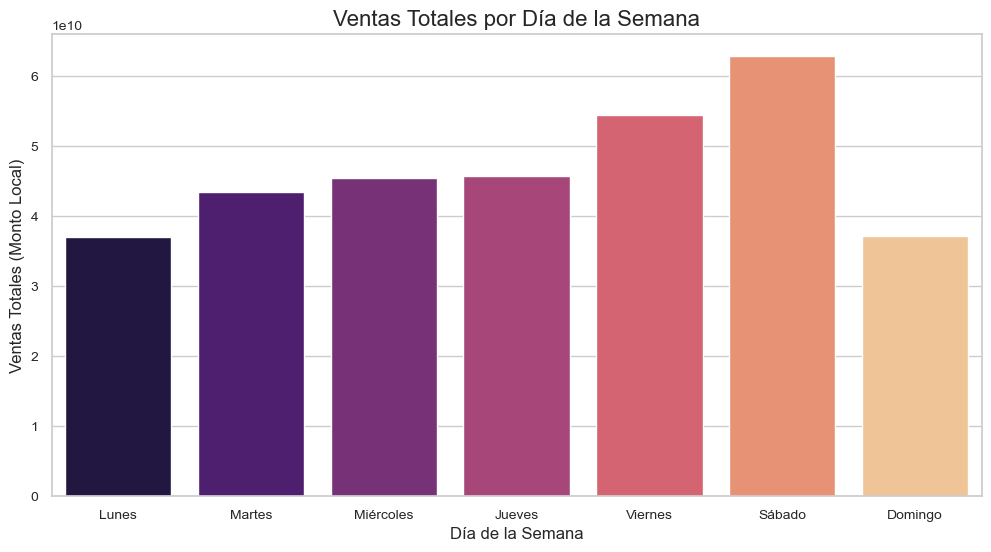

In [8]:
# Gráfico 5: Ventas por Día de la Semana
plt.figure()
sales_by_dow = df.groupby('DayOfWeek')['Local Amount'].sum()
day_map = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
sales_by_dow.index = sales_by_dow.index.map(day_map)
sales_by_dow = sales_by_dow.reindex(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
sns.barplot(x=sales_by_dow.index, y=sales_by_dow.values, palette='magma')
plt.title('Ventas Totales por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Totales (Monto Local)')
plt.savefig('ventas_por_dia.png')
plt.show()